In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Loading dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
# Displaying first five rows of training dataset
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Displaying first five rows of testing dataset
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
# Overview of the training data
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# Summary statistics of training data
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
# Check for missing values in training dataset
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
# Overview of the testing data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
# Summary statistics of testing data
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [ ]:
# Check for missing values in testing dataset
test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [ ]:
from scipy.stats import skew
# Handling Missing Values
train['LotFrontage'].fillna(train['LotFrontage'].median(), inplace=True)
train['GarageYrBlt'].fillna(train['GarageYrBlt'].median(), inplace=True)
train['MasVnrArea'].fillna(0, inplace=True)
train.fillna('None', inplace=True)

# Drop features with too many missing values
train = train.drop(['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)

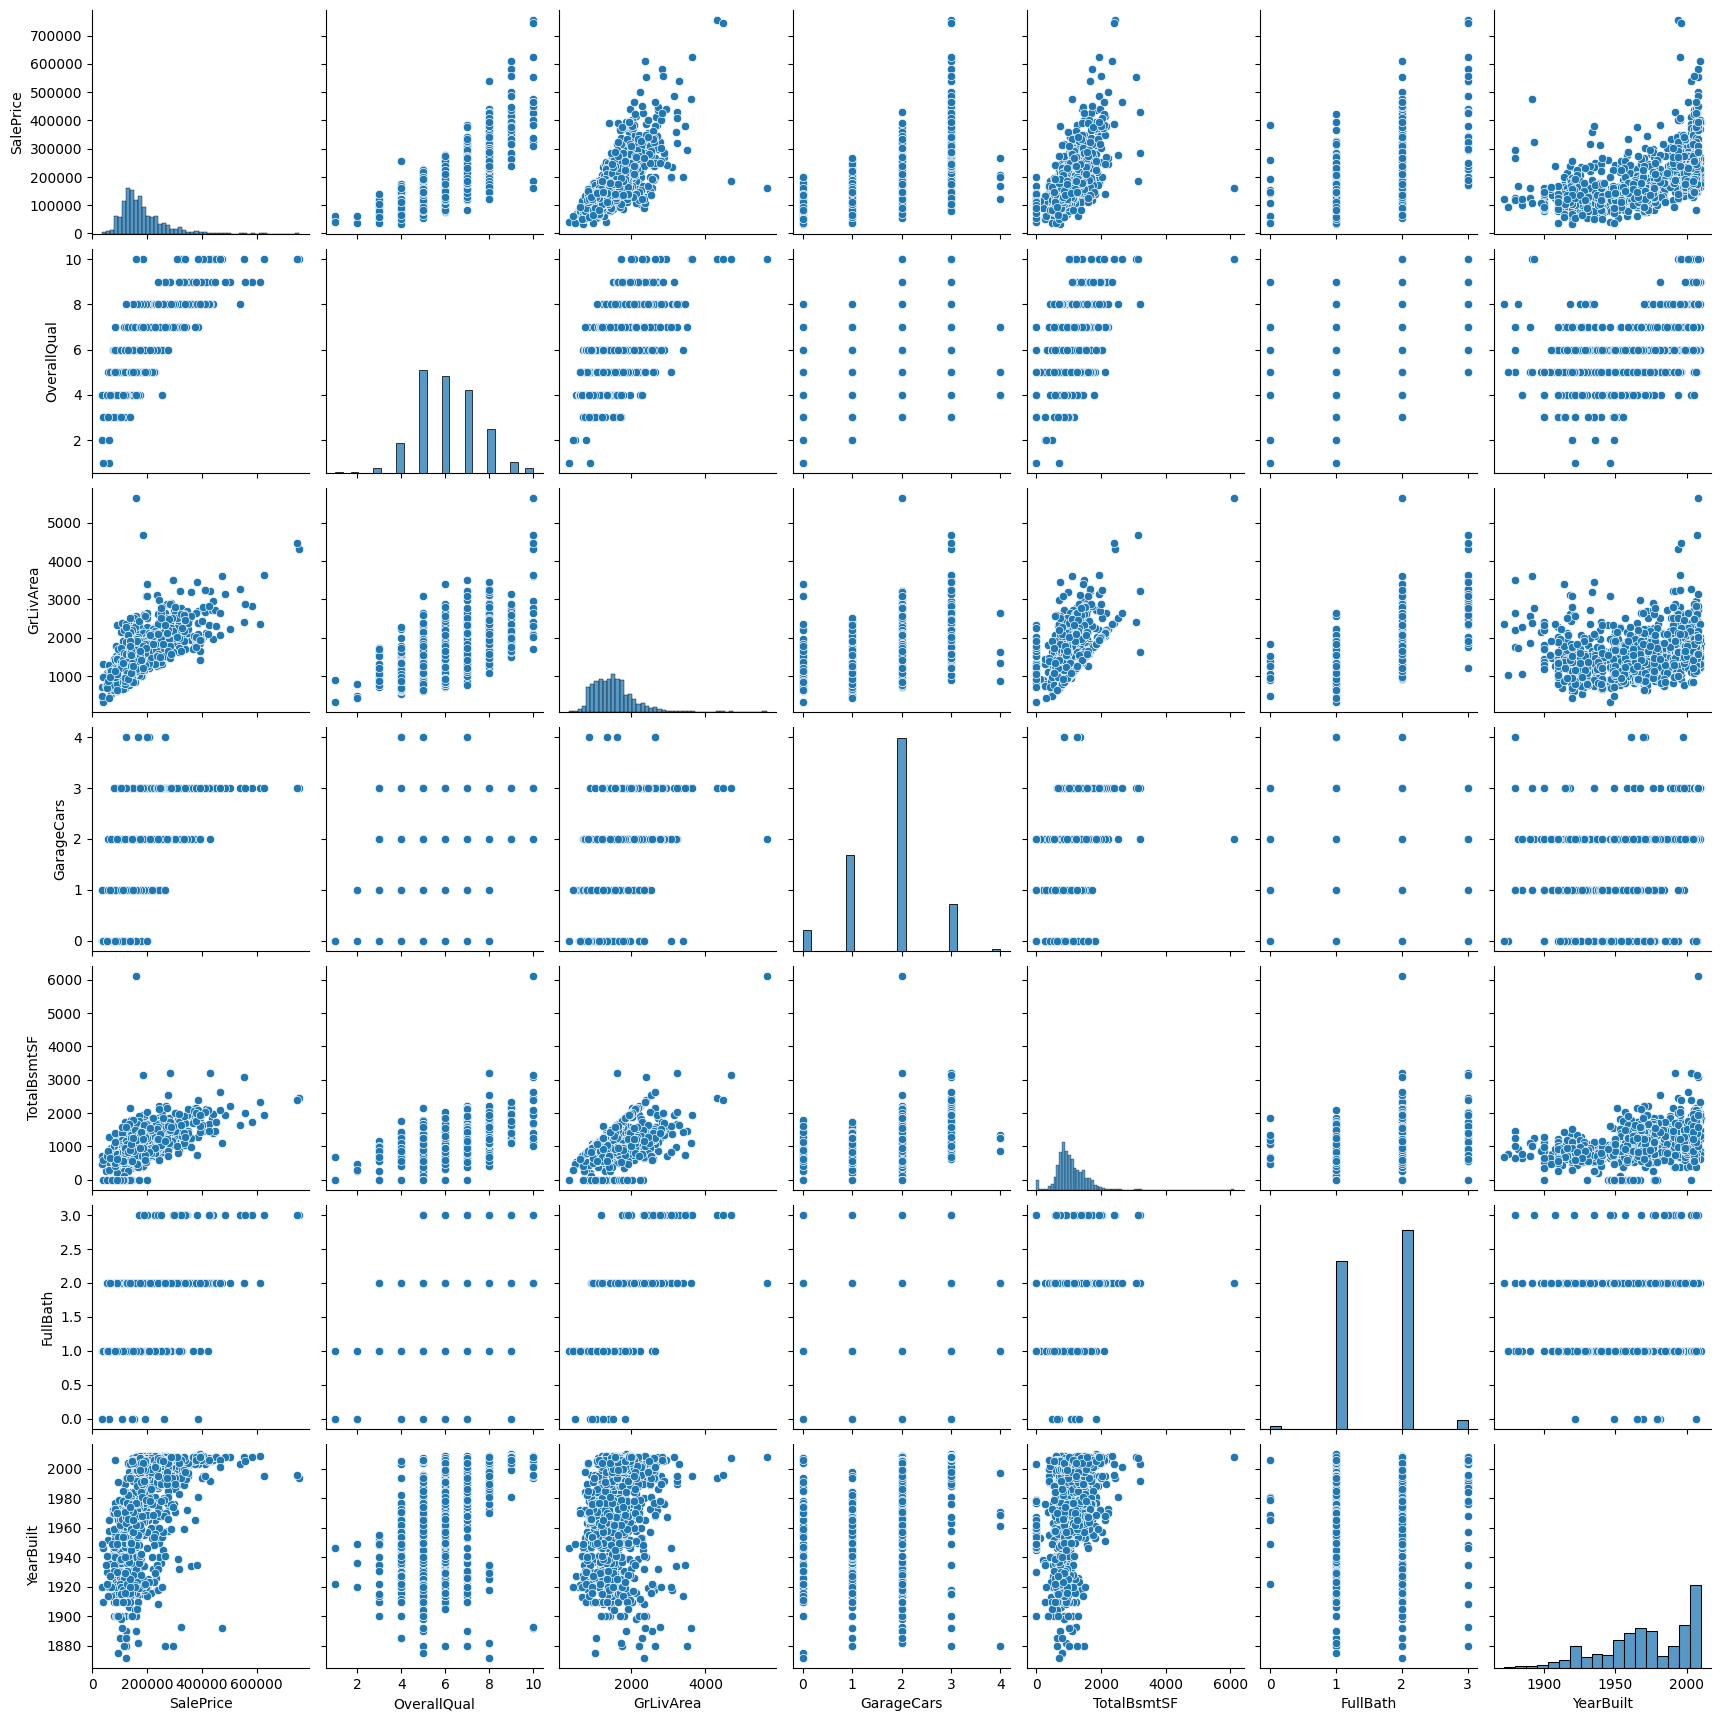

In [ ]:
# Pairplot of key variables
sns.pairplot(train[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']])
plt.show()



 mu = 180921.20 and sigma = 79415.29



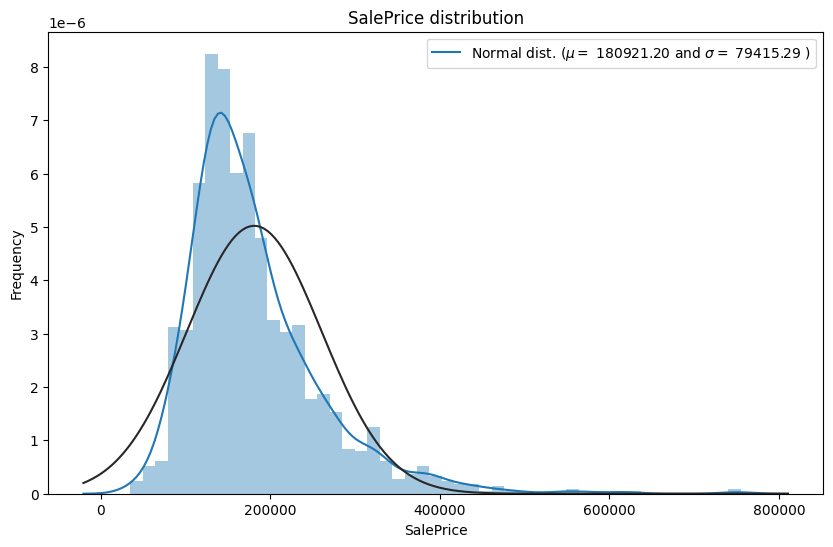

In [ ]:
# Distribution of Target Variable:
# Distribution of SalePrice
plt.figure(figsize=(10, 6))
sns.distplot(train['SalePrice'], fit=stats.norm)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(train['SalePrice'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.show()


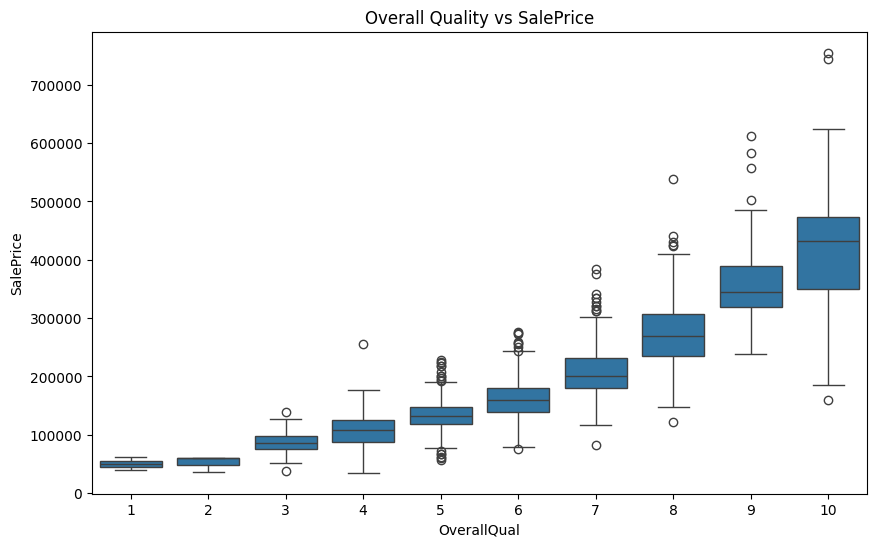

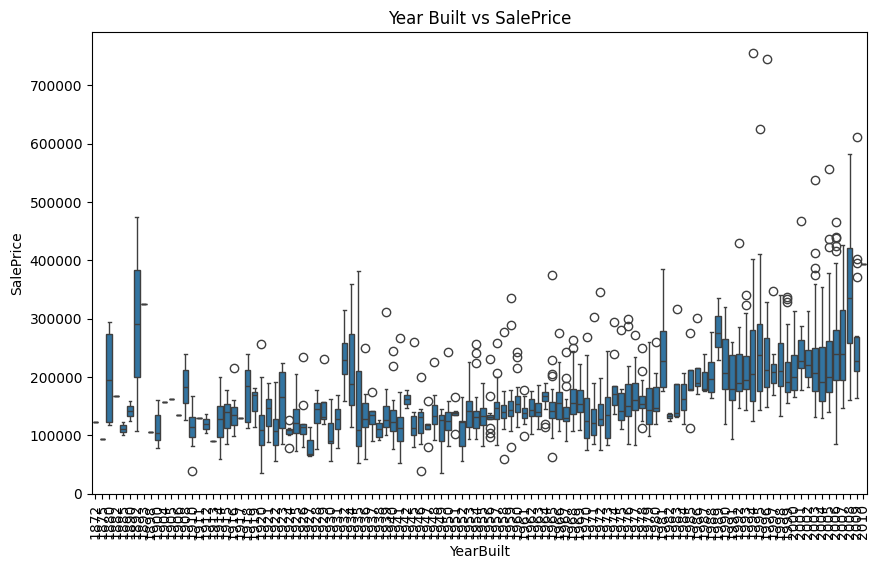

In [ ]:
#Boxplots for Categorical Features:
# Boxplot for OverallQual
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=train)
plt.title('Overall Quality vs SalePrice')
plt.show()

# Boxplot for YearBuilt
plt.figure(figsize=(10, 6))
sns.boxplot(x='YearBuilt', y='SalePrice', data=train)
plt.xticks(rotation=90)
plt.title('Year Built vs SalePrice')
plt.show()


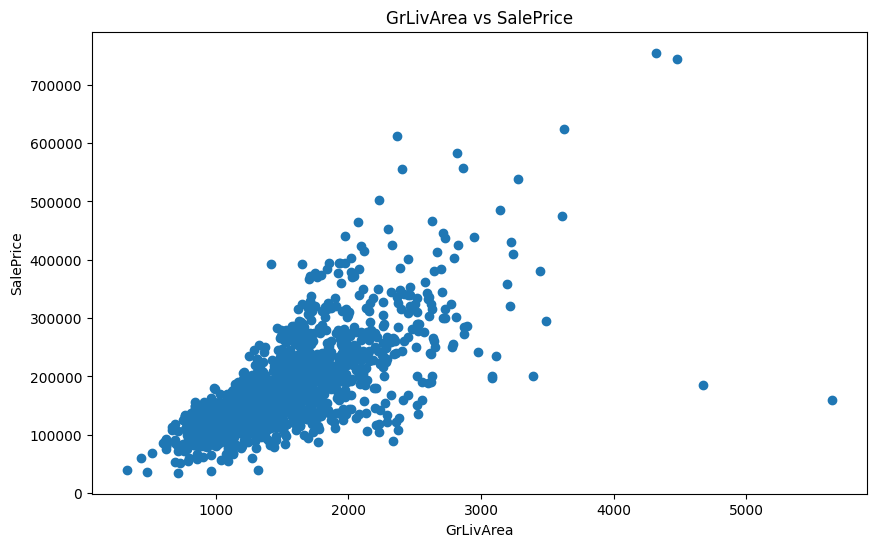

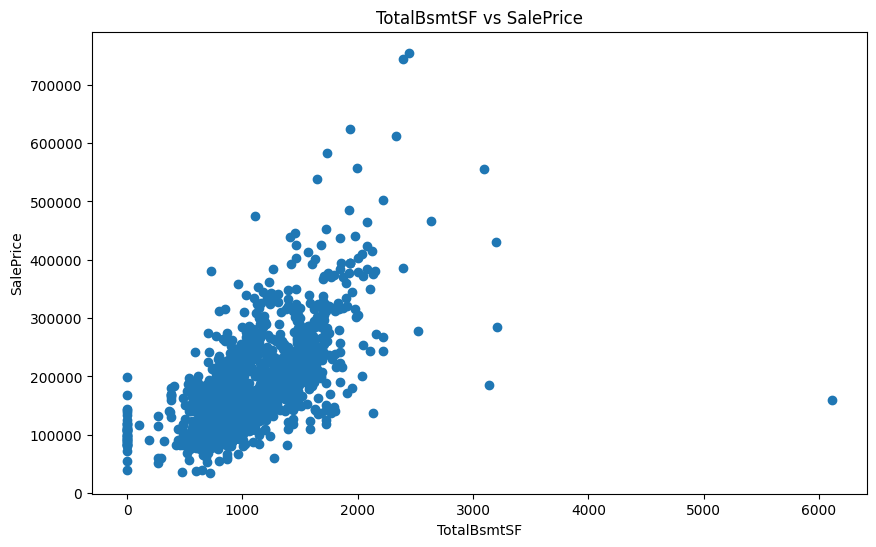

In [ ]:
#Scatterplots for Continuous Features:
# Scatterplot for GrLivArea
plt.figure(figsize=(10, 6))
plt.scatter(train['GrLivArea'], train['SalePrice'])
plt.title('GrLivArea vs SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

# Scatterplot for TotalBsmtSF
plt.figure(figsize=(10, 6))
plt.scatter(train['TotalBsmtSF'], train['SalePrice'])
plt.title('TotalBsmtSF vs SalePrice')
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.show()


In [ ]:
# Transforming Skewed Features
# Check skewness of numeric features
numeric_features = train.select_dtypes(include=[np.number])
skewed_features = numeric_features.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print(skewed_features)

# Log transform skewed features
skewness = skewed_features[skewed_features > 0.75]
skewed_features = skewness.index
for feature in skewed_features:
    train[feature] = np.log1p(train[feature])


MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.674865
LotFrontage       2.406671
OpenPorchSF       2.361912
SalePrice         1.880941
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
OverallQual       0.216721
MoSold            0.211835
BedroomAbvGr      0.211572
GarageArea        0.179796
YrSold            0.096170
FullBath          0.036524
GarageCars       -0.342197
YearRemodAdd     -0.503044
YearBuilt        -0.612831
GarageYrBlt      -0.677636
d

In [ ]:
# Creating New Features

# Total square footage
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']

# Total bathrooms
train['TotalBathrooms'] = train['FullBath'] + 0.5 * train['HalfBath'] + train['BsmtFullBath'] + 0.5 * train['BsmtHalfBath']

# Age of the house
train['HouseAge'] = train['YrSold'] - train['YearBuilt']

# Age since last renovation
train['RemodelAge'] = train['YrSold'] - train['YearRemodAdd']

In [ ]:
# Encoding Categorical Variables
train = pd.get_dummies(train)

# Scaling and Normalizing Data
scaler = StandardScaler()
numeric_features = train.select_dtypes(include=[np.number])
train[numeric_features.columns] = scaler.fit_transform(train[numeric_features.columns])


In [ ]:
# Train-Test Split:
# Splitting the data
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
254,-1.125202,0.153455,-0.144744,-0.795151,0.381743,-0.472560,-1.350194,-0.806841,0.868564,-0.355342,...,False,False,False,True,False,False,False,False,True,False
1066,0.424462,-0.382154,-0.278866,-0.071836,1.280685,0.719786,0.442586,-0.806841,-1.414140,-0.355342,...,False,False,False,True,False,False,False,False,True,False
638,-0.559216,0.016090,-0.059866,-0.795151,1.280685,-2.029235,-1.689368,-0.806841,-1.414140,-0.355342,...,False,False,False,True,False,False,False,False,True,False
799,0.164262,-0.329561,-0.442759,-0.795151,1.280685,-1.134975,-1.689368,1.298824,0.707418,-0.355342,...,False,False,False,True,False,False,False,False,True,False
380,0.164262,-0.899257,-1.147685,-0.795151,0.381743,-1.565545,-1.689368,-0.806841,0.387606,-0.355342,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,-1.125202,0.493170,0.055563,-0.071836,-0.517200,1.150356,1.024029,-0.806841,-0.337963,-0.355342,...,False,False,False,True,False,False,False,False,True,False
1130,0.164262,-0.078896,-0.287024,-1.518467,-2.315085,-1.433062,-1.689368,-0.806841,0.737143,-0.355342,...,False,False,False,True,False,False,False,False,True,False
1294,-1.125202,-0.329561,-0.197944,-0.795151,1.280685,-0.538802,0.248772,-0.806841,0.298972,-0.355342,...,False,False,False,True,False,False,False,False,True,False
860,0.164262,-0.601676,-0.327578,0.651479,2.179628,-1.764269,0.636400,-0.806841,-1.414140,-0.355342,...,False,False,False,True,False,False,False,False,True,False


In [ ]:
X_test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
892,-1.125202,0.153455,-0.141524,-0.071836,2.179628,-0.273836,0.878668,-0.806841,0.758452,-0.355342,...,False,False,False,True,False,False,False,False,True,False
1105,0.424462,1.211213,0.585636,1.374795,-0.517200,0.752907,0.491040,1.436203,0.906207,-0.355342,...,False,False,False,True,False,False,False,False,True,False
413,-0.559216,-0.545359,-0.019972,-0.795151,0.381743,-1.466183,-1.689368,-0.806841,-1.414140,-0.355342,...,False,False,False,True,False,False,False,False,True,False
522,0.164262,-0.899257,-1.147685,-0.071836,1.280685,-0.803768,-1.689368,-0.806841,0.589006,-0.355342,...,False,False,False,True,False,False,False,False,True,False
1036,-1.125202,0.907955,0.684347,2.098110,-0.517200,1.183477,1.120936,0.815271,0.902955,-0.355342,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,-0.559216,-0.899257,-0.819544,-1.518467,1.280685,-1.134975,0.733308,1.505933,0.300956,-0.355342,...,False,False,False,True,False,False,True,False,False,False
1361,-1.125202,1.953190,1.120022,0.651479,-0.517200,1.117235,0.975575,0.271304,0.976578,-0.355342,...,False,False,False,True,False,False,False,False,True,False
802,0.424462,-0.176805,-0.191567,0.651479,-0.517200,1.117235,0.975575,-0.806841,0.750813,-0.355342,...,False,False,False,True,False,False,False,False,True,False
651,0.645073,-0.329561,0.006600,-1.518467,-0.517200,-1.035613,-1.689368,-0.806841,-1.414140,-0.355342,...,False,False,False,True,False,False,False,False,True,False


In [ ]:
y_train

254    -0.349504
1066    0.164000
638    -1.686997
799     0.121433
380    -0.681439
          ...   
1095    0.141842
1130   -0.528458
1294   -0.930002
860     0.326722
1126    0.107081
Name: SalePrice, Length: 1168, dtype: float64

In [ ]:
y_test

892    -0.190581
1105    1.671689
413    -0.930002
522    -0.118683
1036    1.597395
          ...   
479    -1.558620
1361    1.112871
802     0.314165
651    -1.087273
722    -0.731228
Name: SalePrice, Length: 292, dtype: float64

In [ ]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print('Linear Regression RMSE:', np.sqrt(mean_squared_error(y_test, lr_pred)))

Linear Regression RMSE: 106130972.149215


In [ ]:
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
print('Ridge Regression RMSE:', np.sqrt(mean_squared_error(y_test, ridge_pred)))

Ridge Regression RMSE: 0.31004598047497833


In [ ]:
# Lasso Regression
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
print('Lasso Regression RMSE:', np.sqrt(mean_squared_error(y_test, lasso_pred)))

Lasso Regression RMSE: 0.3066890874995312


In [ ]:
# ElasticNet Regression
elastic_net = ElasticNet(alpha=0.001, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)
elastic_net_pred = elastic_net.predict(X_test)
print('ElasticNet Regression RMSE:', np.sqrt(mean_squared_error(y_test, elastic_net_pred)))

ElasticNet Regression RMSE: 0.3053610466355843


In [ ]:
# Support Vector Regression
svr = SVR(kernel='linear', C=1.0, epsilon=0.2)
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)
print('Support Vector Regression RMSE:', np.sqrt(mean_squared_error(y_test, svr_pred)))

Support Vector Regression RMSE: 0.32294157565727405


In [ ]:
# Kernel Ridge Regression
kr = KernelRidge(alpha=1.0, kernel='linear')
kr.fit(X_train, y_train)
kr_pred = kr.predict(X_test)
print('Kernel Ridge Regression RMSE:', np.sqrt(mean_squared_error(y_test, kr_pred)))


Kernel Ridge Regression RMSE: 0.31065073967951856


In [ ]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print('Random Forest RMSE:', np.sqrt(mean_squared_error(y_test, rf_pred)))

Random Forest RMSE: 0.35952161689373124


In [ ]:
# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100)
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)
print('Gradient Boosting RMSE:', np.sqrt(mean_squared_error(y_test, gbr_pred)))

Gradient Boosting RMSE: 0.34041411031532903


In [ ]:
# GridSearchCV for Ridge Regression
ridge_params = {'alpha': [0.1, 1.0, 10.0]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)
print('Best Ridge Params:', ridge_grid.best_params_)
ridge_best = ridge_grid.best_estimator_
ridge_best_pred = ridge_best.predict(X_test)
print('Tuned Ridge Regression RMSE:', np.sqrt(mean_squared_error(y_test, ridge_best_pred)))

# GridSearchCV for Lasso Regression
lasso_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)
print('Best Lasso Params:', lasso_grid.best_params_)
lasso_best = lasso_grid.best_estimator_
lasso_best_pred = lasso_best.predict(X_test)
print('Tuned Lasso Regression RMSE:', np.sqrt(mean_squared_error(y_test, lasso_best_pred)))


Best Ridge Params: {'alpha': 10.0}
Tuned Ridge Regression RMSE: 0.32225430285494067
Best Lasso Params: {'alpha': 0.001}
Tuned Lasso Regression RMSE: 0.3066890874995312


                         Model          RMSE
3                   ElasticNet  3.053610e-01
2             Lasso Regression  3.066891e-01
1             Ridge Regression  3.100460e-01
5      Kernel Ridge Regression  3.106507e-01
4    Support Vector Regression  3.229416e-01
7  Gradient Boosting Regressor  3.404141e-01
6      Random Forest Regressor  3.595216e-01
8           AdaBoost Regressor  4.396172e-01
0            Linear Regression  1.061310e+08


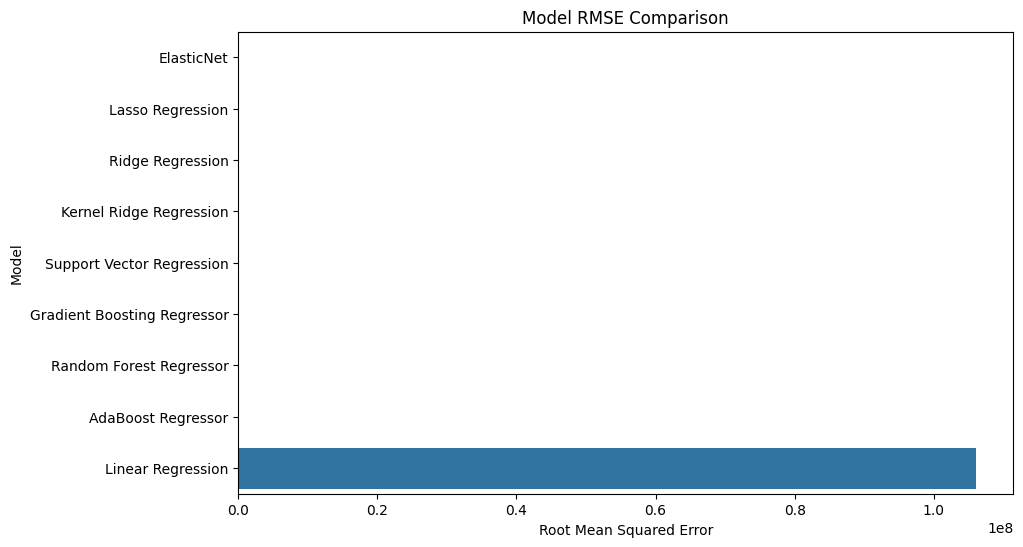

In [ ]:
# Collecting results
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet',
          'Support Vector Regression', 'Kernel Ridge Regression', 'Random Forest Regressor',
          'Gradient Boosting Regressor', 'AdaBoost Regressor']
rmse = [np.sqrt(mean_squared_error(y_test, lr_pred)),
        np.sqrt(mean_squared_error(y_test, ridge_pred)),
        np.sqrt(mean_squared_error(y_test, lasso_pred)),
        np.sqrt(mean_squared_error(y_test, elastic_net_pred)),
        np.sqrt(mean_squared_error(y_test, svr_pred)),
        np.sqrt(mean_squared_error(y_test, kr_pred)),
        np.sqrt(mean_squared_error(y_test, rf_pred)),
        np.sqrt(mean_squared_error(y_test, gbr_pred)),
        np.sqrt(mean_squared_error(y_test, ada_pred))]

# Creating DataFrame to compare results
results = pd.DataFrame({
    'Model': models,
    'RMSE': rmse
})

# Sorting the DataFrame by RMSE
results = results.sort_values(by='RMSE', ascending=True)
print(results)

# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(x='RMSE', y='Model', data=results)
plt.title('Model RMSE Comparison')
plt.xlabel('Root Mean Squared Error')
plt.ylabel('Model')
plt.show()


In [ ]:
from sklearn.metrics import r2_score

r2_scores = {
    'Linear Regression': r2_score(y_test, lr_pred),
    'Ridge Regression': r2_score(y_test, ridge_pred),
    'Lasso Regression': r2_score(y_test, lasso_pred),
    'ElasticNet': r2_score(y_test, elastic_net_pred),
    'Support Vector Regression': r2_score(y_test, svr_pred),
    'Kernel Ridge Regression': r2_score(y_test, kr_pred),
    'Random Forest Regressor': r2_score(y_test, rf_pred),
    'Gradient Boosting Regressor': r2_score(y_test, gbr_pred),
    'AdaBoost Regressor': r2_score(y_test, ada_pred)
}

# Printing R^2 scores
for model, score in r2_scores.items():
    print(f'{model}: {score:.4f}')


Linear Regression: -9624380356924724.0000
Ridge Regression: 0.9179
Lasso Regression: 0.9196
ElasticNet: 0.9203
Support Vector Regression: 0.9109
Kernel Ridge Regression: 0.9175
Random Forest Regressor: 0.8896
Gradient Boosting Regressor: 0.9010
AdaBoost Regressor: 0.8349


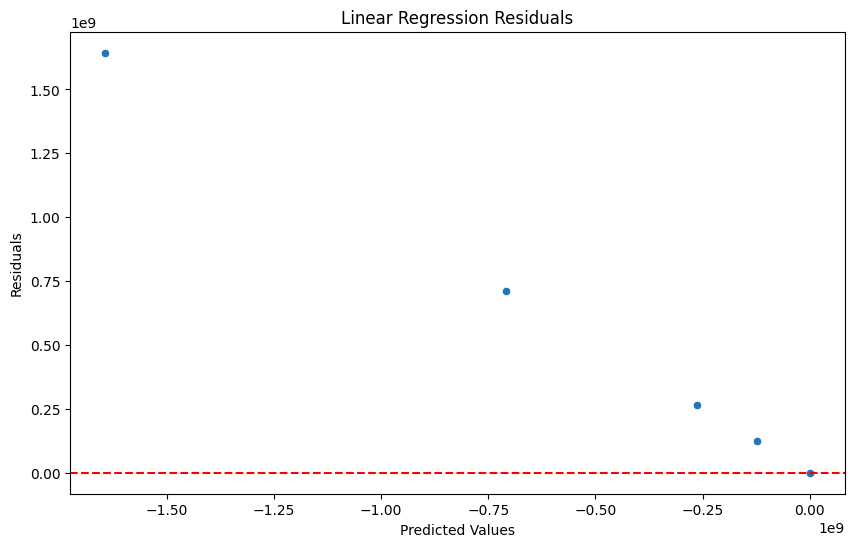

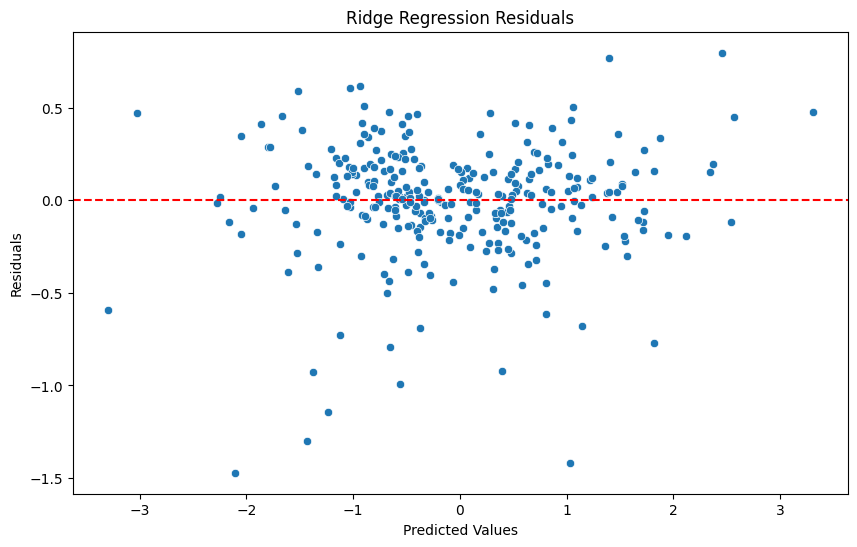

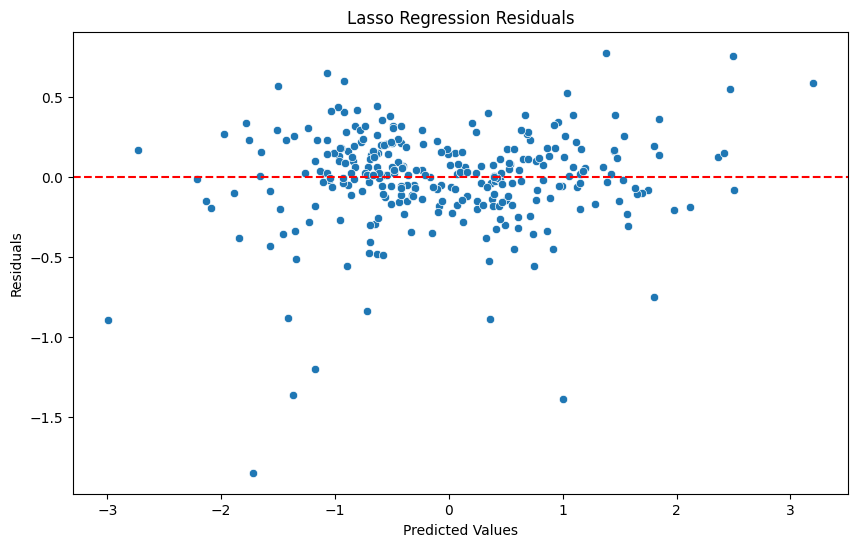

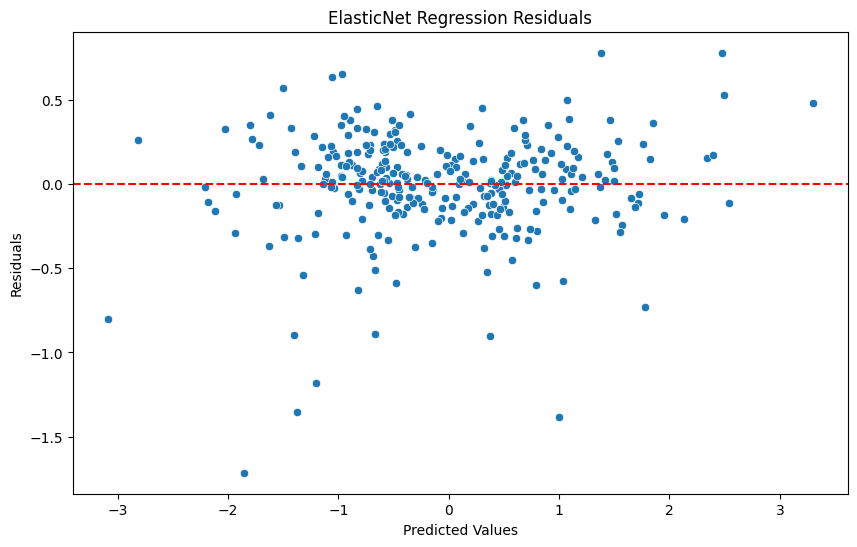

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the function to plot residuals
def plot_residuals(y_test, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    residuals = y_test - y_pred
    # Pass data as a dictionary for clarity
    sns.scatterplot(x=y_pred, y=residuals)  # Use x and y keywords
    plt.axhline(0, linestyle='--', color='r')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'{model_name} Residuals')
    plt.show()

# Assuming y_test and predictions (y_pred) for each model are already defined

# Residuals for Linear Regression
plot_residuals(y_test, lr_pred, 'Linear Regression')

# Residuals for Ridge Regression
plot_residuals(y_test, ridge_pred, 'Ridge Regression')

# Residuals for Lasso Regression
plot_residuals(y_test, lasso_pred, 'Lasso Regression')

# Residuals for ElasticNet Regression
plot_residuals(y_test, elastic_net_pred, 'ElasticNet Regression')

In [ ]:
# Detect outliers using Z-score
from scipy.stats import zscore

numeric_features = train.select_dtypes(include=[np.number])
z_scores = np.abs(zscore(numeric_features))

# Set a threshold for outliers
threshold = 3

# Remove outliers
train = train[(z_scores < threshold).all(axis=1)]


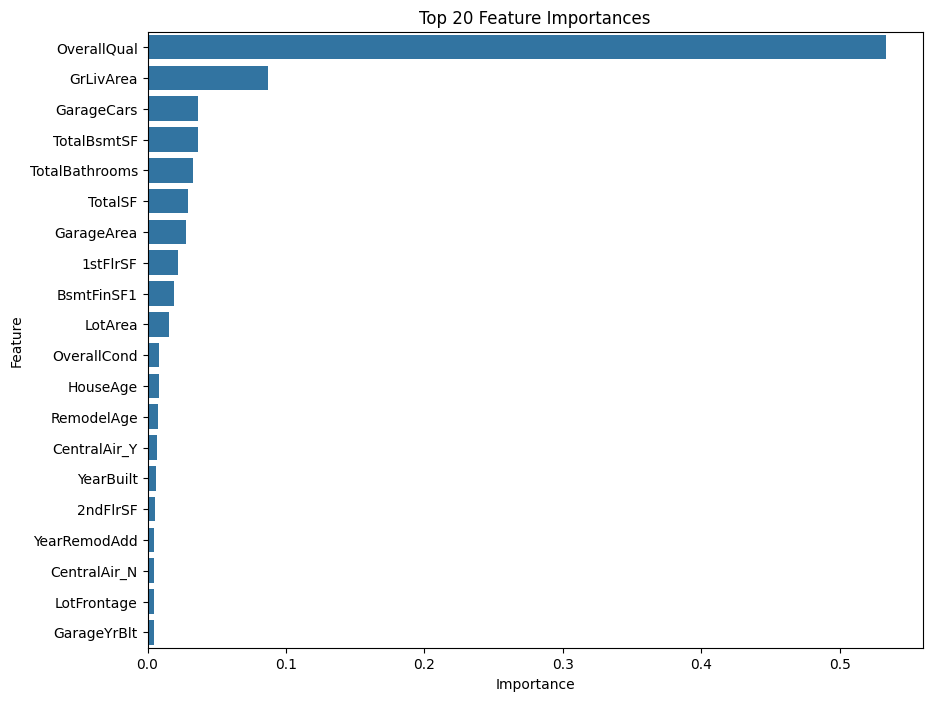

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Fit RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
features = X_train.columns
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(20))
plt.title('Top 20 Feature Importances')
plt.show()


In [ ]:
#Stacking model
from sklearn.ensemble import StackingRegressor

# Define base models
estimators = [
    ('ridge', Ridge(alpha=1.0)),
    ('lasso', Lasso(alpha=0.001)),
    ('elastic_net', ElasticNet(alpha=0.001, l1_ratio=0.5)),
    ('svr', SVR(kernel='linear', C=1.0, epsilon=0.2)),
    ('kr', KernelRidge(alpha=1.0, kernel='linear')),
    ('rf', RandomForestRegressor(n_estimators=100)),
    ('gbr', GradientBoostingRegressor(n_estimators=100)),
    ('ada', AdaBoostRegressor(n_estimators=100))
]

# Define stacking model
stacking_model = StackingRegressor(estimators=estimators, final_estimator=GradientBoostingRegressor(n_estimators=100))

# Fit stacking model
stacking_model.fit(X_train, y_train)
stacking_pred = stacking_model.predict(X_test)
print('Stacking Regressor RMSE:', np.sqrt(mean_squared_error(y_test, stacking_pred)))


Stacking Regressor RMSE: 0.3780732241993188


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(stacking_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print('Cross-Validation RMSE:', cv_rmse)
print('Mean CV RMSE:', cv_rmse.mean())


Cross-Validation RMSE: [0.277133   0.35798081 0.36362186 0.26279926 0.3296679 ]
Mean CV RMSE: 0.3182405639691751


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'learning_rate': [0.01, 0.05, 0.1]
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(GradientBoostingRegressor(), param_distributions=param_dist, n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)

# Get best estimator
best_model = random_search.best_estimator_
best_pred = best_model.predict(X_test)
print('Best Model RMSE:', np.sqrt(mean_squared_error(y_test, best_pred)))


Best Model RMSE: 0.33082046595570586


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial and interaction features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

# Split the data
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Fit the model on polynomial features
poly_model = GradientBoostingRegressor(n_estimators=100)
poly_model.fit(X_train_poly, y_train)
poly_pred = poly_model.predict(X_test_poly)
print('Polynomial Features Model RMSE:', np.sqrt(mean_squared_error(y_test, poly_pred)))


Polynomial Features Model RMSE: 0.3428804640530411


In [ ]:
import plotly.express as px

# Plotly correlation matrix
corr_matrix = train.corr()
fig = px.imshow(corr_matrix, text_auto=True, aspect='auto', color_continuous_scale='RdBu_r', origin='lower')
fig.update_layout(title='Correlation Matrix', xaxis_title='Features', yaxis_title='Features')
fig.show()

# Plotly 3D scatter plot
fig = px.scatter_3d(train, x='GrLivArea', y='TotalBsmtSF', z='SalePrice', color='OverallQual', title='3D Scatter Plot')
fig.show()


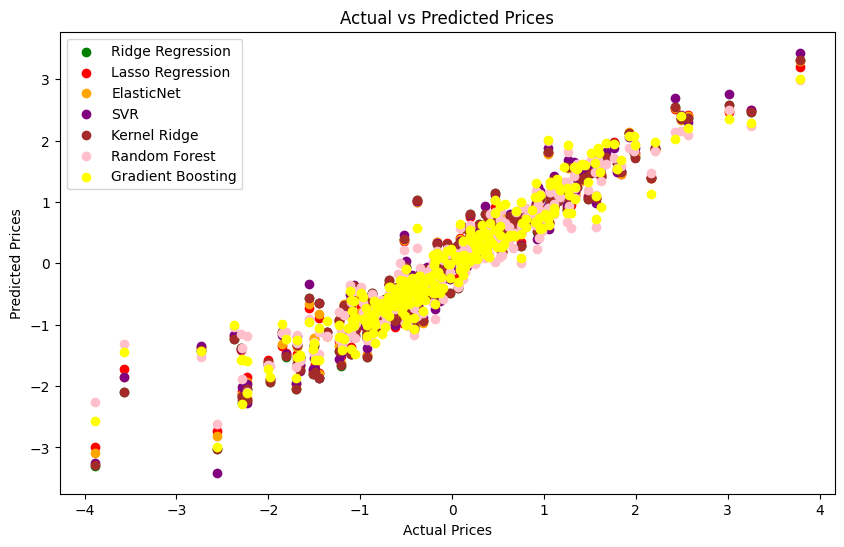

In [ ]:
plt.figure(figsize=(10, 6))
#plt.scatter(y_test, lr_pred, color='blue', label='Linear Regression')
plt.scatter(y_test, ridge_pred, color='green', label='Ridge Regression')
plt.scatter(y_test, lasso_pred, color='red', label='Lasso Regression')
plt.scatter(y_test, elastic_net_pred, color='orange', label='ElasticNet')
plt.scatter(y_test, svr_pred, color='purple', label='SVR')
plt.scatter(y_test, kr_pred, color='brown', label='Kernel Ridge')
plt.scatter(y_test, rf_pred, color='pink', label='Random Forest')
plt.scatter(y_test, gbr_pred, color='yellow', label='Gradient Boosting')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()


In [ ]:
import pandas as pd

# Create a DataFrame to display actual and predicted prices
results = pd.DataFrame({
    'Actual Prices': y_test.values,
    'Linear Regression Predicted': lr_pred,
    'Ridge Regression Predicted': ridge_pred,
    'Lasso Regression Predicted': lasso_pred,
    'ElasticNet Regression Predicted': elastic_net_pred,
    'SVR Predicted': svr_pred,
    'Kernel Ridge Regression Predicted': kr_pred,
    'Random Forest Regression Predicted': rf_pred,
    'Gradient Boosting Regression Predicted': gbr_pred
})

# Display the first few rows of the results DataFrame
print(results.head())


   Actual Prices  Linear Regression Predicted  Ridge Regression Predicted  \
0      -0.190581                    -0.176040                   -0.203253   
1       1.671689                     1.816891                    1.728755   
2      -0.930002                    -1.228972                   -1.158595   
3      -0.118683                     0.067628                    0.031839   
4       1.597395                     1.663610                    1.715177   

   Lasso Regression Predicted  ElasticNet Regression Predicted  SVR Predicted  \
0                   -0.234905                        -0.216218      -0.187987   
1                    1.751046                         1.728198       1.814014   
2                   -1.161910                        -1.152249      -1.191838   
3                   -0.071359                        -0.034581       0.013896   
4                    1.698455                         1.711415       1.745384   

   Kernel Ridge Regression Predicted  Random Fores

In [ ]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE for each model
mae_lr = mean_absolute_error(y_test, lr_pred)
mae_ridge = mean_absolute_error(y_test, ridge_pred)
mae_lasso = mean_absolute_error(y_test, lasso_pred)
mae_elastic_net = mean_absolute_error(y_test, elastic_net_pred)
mae_svr = mean_absolute_error(y_test, svr_pred)
mae_kr = mean_absolute_error(y_test, kr_pred)
mae_rf = mean_absolute_error(y_test, rf_pred)
mae_gbr = mean_absolute_error(y_test, gbr_pred)
mae_stacking = mean_absolute_error(y_test, stacking_pred)
mae_poly = mean_absolute_error(y_test, poly_pred)

# Print MAE for each model
print(f'Linear Regression MAE: {mae_lr}')
print(f'Ridge Regression MAE: {mae_ridge}')
print(f'Lasso Regression MAE: {mae_lasso}')
print(f'ElasticNet Regression MAE: {mae_elastic_net}')
print(f'SVR MAE: {mae_svr}')
print(f'Kernel Ridge Regression MAE: {mae_kr}')
print(f'Random Forest Regression MAE: {mae_rf}')
print(f'Gradient Boosting Regression MAE: {mae_gbr}')
print(f'Stacking Regressor MAE: {mae_stacking}')
print(f'Polynomial Features Model MAE: {mae_poly}')

Linear Regression MAE: 9383175.093356792
Ridge Regression MAE: 0.2127564064061934
Lasso Regression MAE: 0.20759006979680203
ElasticNet Regression MAE: 0.20802344319383134
SVR MAE: 0.21500700249086405
Kernel Ridge Regression MAE: 0.2130420599426114
Random Forest Regression MAE: 0.23696517532701206
Gradient Boosting Regression MAE: 0.23386121395424928
Stacking Regressor MAE: 0.22911881460006978
Polynomial Features Model MAE: 0.2292439120264625
